<a href="https://colab.research.google.com/github/jmabe01/machine-learning/blob/main/Jordyn_Mabe_801186783_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727


Text(0.5, 257.44, 'Predicted')

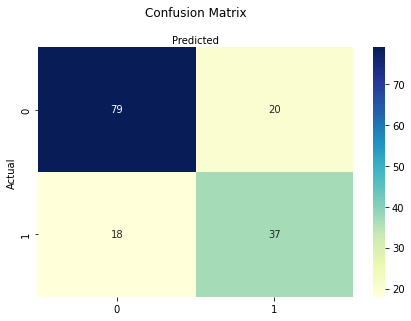

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import seaborn as sns

#Problem1: Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). 
#Make sure to perform proper scaling and standardization before your training. Report your results, including accuracy, precision, and recall. At the end, plot the confusion 
#matrix representing your binary classifier. 
ds = pd.read_csv("diabetes.csv")
X = ds.iloc[:,:-1].values
Y = ds.iloc[:,8].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
logclass = LogisticRegression(random_state=0)
logclass.fit(X_train, Y_train)
Y_Pred = logclass.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_Pred))
print("Precision:", metrics.precision_score(Y_test, Y_Pred))
print("Recall:", metrics.recall_score(Y_test, Y_Pred))

cnfm = confusion_matrix(Y_test, Y_Pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnfm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Accuracy: 76.555% (3.185%)
Accuracy: 76.818% (3.744%)
[[156  14]
 [ 39  45]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       170
           1       0.76      0.54      0.63        84

    accuracy                           0.79       254
   macro avg       0.78      0.73      0.74       254
weighted avg       0.79      0.79      0.78       254



Text(0.5, 257.44, 'Predicted')

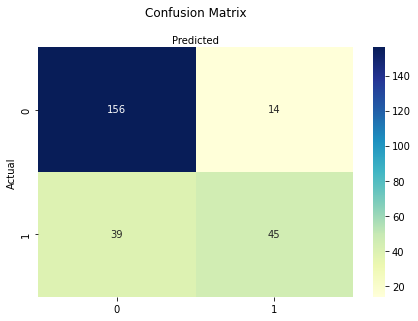

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns

#Problem2: Repeat problem 1, and this time use K-fold cross-validation for your training and validation. Perform the training two times for K=5 and K=10. 
#Analyze and compare your average accuracy against problem 1.
diabetes = pd.read_csv("diabetes.csv")
X = ds.iloc[:,:-1].values
Y = ds.iloc[:,8].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
C = [10,1,.1,.001]
for c in C:
  clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
  clf.fit(X_train, Y_train)

#k=5
kfold1 = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold1)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

#k=10
kfold2 = KFold(n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold2)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
logclass = LogisticRegression(solver='liblinear')
logclass.fit(X_train, Y_train)
Y_Pred = logclass.predict(X_test)
cnfm = confusion_matrix(Y_test, Y_Pred)
print(cnfm)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
logclass1 = LogisticRegression(solver='liblinear')
logclass1.fit(X_train, Y_train)
Y_Pred = logclass.predict(X_test)
report = classification_report(Y_test, Y_Pred)
print(report)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnfm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

(569, 30)
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465


Text(0.5, 257.44, 'Predicted')

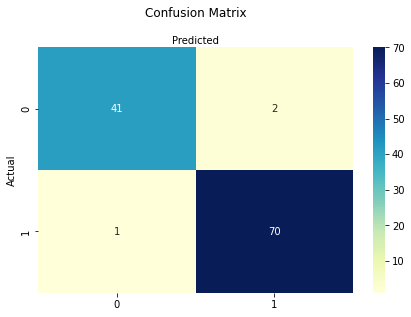

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import seaborn as sns

#Problem3:
#1.Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input 
#features for classification. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. 
#Report your results, including accuracy, precision, and recall. At the end, plot the confusion matrix representing your binary classifier. 

#dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
breast_input = pd.DataFrame(X)
breast_input.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
logclass = LogisticRegression(random_state=0)
logclass.fit(X_train, Y_train)
Y_Pred = logclass.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_Pred))
print("Precision:", metrics.precision_score(Y_test, Y_Pred))
print("Recall:", metrics.recall_score(Y_test, Y_Pred))

cnfm = confusion_matrix(Y_test, Y_Pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnfm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

(569, 30)
Accuracy: 0.9649122807017544
Precision: 0.9466666666666667
Recall: 1.0


Text(0.5, 257.44, 'Predicted')

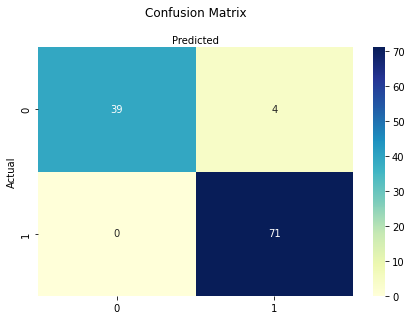

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import seaborn as sns

#2.How about adding weight penalty here, considering the number of parameters. Add the weight penalty and repeat the training and report the results.

#dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
breast_input = pd.DataFrame(X)
breast_input.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
logclass = LogisticRegression(penalty='l2', C=0.01)
logclass.fit(X_train, Y_train)
Y_Pred = logclass.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_Pred))
print("Precision:", metrics.precision_score(Y_test, Y_Pred))
print("Recall:", metrics.recall_score(Y_test, Y_Pred))

cnfm = confusion_matrix(Y_test, Y_Pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnfm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

(569, 30)
Accuracy: 95.434% (2.737%)
Accuracy: 95.432% (3.858%)
[[ 66   1]
 [  6 115]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.99      0.95      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.97      0.96       188
weighted avg       0.96      0.96      0.96       188



Text(0.5, 257.44, 'Predicted')

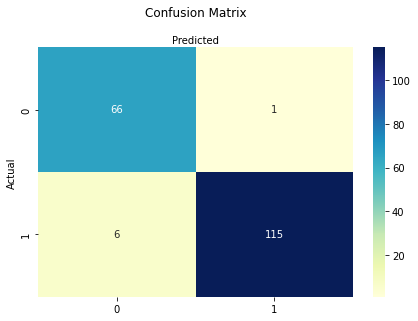

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import seaborn as sns

#Problem4:
#1. Repeat problem 3, and this time use K-fold cross-validation for your training and validation. Perform the training two times for K=5 and K=10. Analyze and compare your average 
#accuracy against problem 3. 

#dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
breast_input = pd.DataFrame(X)
breast_input.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
C = [10,1,.1,.001]
for c in C:
  clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
  clf.fit(X_train, Y_train)

#k=5
kfold1 = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold1)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

#k=10
kfold2 = KFold(n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold2)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
logclass = LogisticRegression(solver='liblinear')
logclass.fit(X_train, Y_train)
Y_Pred = logclass.predict(X_test)
cnfm = confusion_matrix(Y_test, Y_Pred)
print(cnfm)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
logclass1 = LogisticRegression(solver='liblinear')
logclass1.fit(X_train, Y_train)
Y_Pred = logclass.predict(X_test)
report = classification_report(Y_test, Y_Pred)
print(report)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnfm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

(569, 30)
Accuracy: 95.434% (2.737%)
Accuracy: 95.432% (3.858%)
[[ 62   5]
 [  6 115]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        67
           1       0.96      0.95      0.95       121

    accuracy                           0.94       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188



Text(0.5, 257.44, 'Predicted')

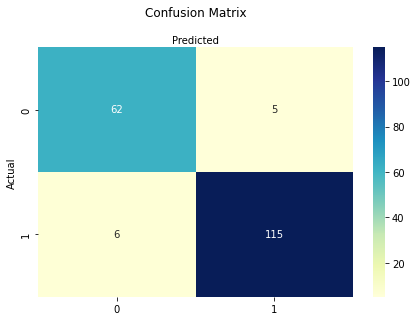

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import seaborn as sns

#2. How about adding weight penalty here, considering the number of parameters. Add the weight penalty and repeat the training and report the average accuracy.

#dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
breast_input = pd.DataFrame(X)
breast_input.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
C = [10,1,.1,.001]
for c in C:
  clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
  clf.fit(X_train, Y_train)

#k=5
kfold1 = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold1)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

#k=10
kfold2 = KFold(n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold2)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
logclass = LogisticRegression(solver='liblinear', penalty='l2', C=0.01)
logclass.fit(X_train, Y_train)
Y_Pred = logclass.predict(X_test)
cnfm = confusion_matrix(Y_test, Y_Pred)
print(cnfm)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
logclass1 = LogisticRegression(solver='liblinear', penalty='l2', C=0.01)
logclass1.fit(X_train, Y_train)
Y_Pred = logclass.predict(X_test)
report = classification_report(Y_test, Y_Pred)
print(report)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnfm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')